In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

for year in range(2018, 2026):
    file_path = f'/content/drive/MyDrive/CS506/MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_{year}.zip'
    if os.path.exists(file_path):
        print(f'Unzipping {file_path}...')
        !unzip "{file_path}" -d MBTA_avg_delay
    else:
        print(f'File not found: {file_path}')

In [4]:
!ls MBTA_avg_delay | head -20

Bus Arrival Departure Times Apr-June 2020.csv
Bus Arrival Departure Times Jan-Mar 2020.csv
Bus Arrival Departure Times Jul-Sep 2020.csv
Bus Arrival Departure Times Oct-Dec 2020.csv
__MACOSX
MBTA Bus Arrival Departure Times 2018
MBTA Bus Arrival Departure Times 2019
MBTA_Bus_Arrival_Departure_Times_2021
MBTA_Bus_Arrival_Departure_Times_2022
MBTA_Bus_Arrival_Departure_Times_2023
MBTA_Bus_Arrival_Departure_Times_2024
MBTA_Bus_Arrival_Departure_Times_2025


In [5]:
df18 = pd.read_csv("MBTA_avg_delay/MBTA Bus Arrival Departure Times 2018/MBTA Bus Arrival Departure Aug-Sept 2018.csv")

print(df18.shape)
print(df18.columns)
print(df18.head())

(5117779, 14)
Index(['service_date', 'route_id', 'direction', 'half_trip_id', 'stop_id',
       'time_point_id', 'time_point_order', 'point_type', 'standard_type',
       'scheduled', 'actual', 'earliness', 'scheduled_headway', 'headway'],
      dtype='object')
           service_date route_id direction  half_trip_id  stop_id  \
0  2018-08-01T00:00:00Z       01   Inbound    40121394.0       75   
1  2018-08-01T00:00:00Z       01   Inbound    40121394.0       79   
2  2018-08-01T00:00:00Z       01   Inbound    40121394.0      187   
3  2018-08-01T00:00:00Z       01   Inbound    40121394.0       59   
4  2018-08-01T00:00:00Z       01   Inbound    40121565.0      110   

  time_point_id  time_point_order  point_type standard_type  \
0           mit               4.0    Midpoint      Schedule   
1         hynes               5.0    Midpoint      Schedule   
2         masta               6.0    Midpoint      Schedule   
3         Wasma               7.0    Midpoint      Schedule   
4       

In [6]:
import glob

files = glob.glob("MBTA_avg_delay/**/*.csv", recursive=True)
print("Total files found:", len(files))
print(files[:10]) # Print the first 10 files to verify

Total files found: 67
['MBTA_avg_delay/Bus Arrival Departure Times Oct-Dec 2020.csv', 'MBTA_avg_delay/Bus Arrival Departure Times Jul-Sep 2020.csv', 'MBTA_avg_delay/Bus Arrival Departure Times Jan-Mar 2020.csv', 'MBTA_avg_delay/Bus Arrival Departure Times Apr-June 2020.csv', 'MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-10.csv', 'MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-08.csv', 'MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-11.csv', 'MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-12.csv', 'MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-01.csv', 'MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-06.csv']


In [ ]:
import pandas as pd

columns_per_file = {}

for f in files:
    try:
        # read  the header row
        cols = list(pd.read_csv(f, nrows=0).columns)
        columns_per_file[f.split('/')[-1]] = cols
    except Exception as e:
        print(f"Error reading {f}: {e}")

# summary of cols
for name, cols in columns_per_file.items():
    print(f"\n{name} -> {len(cols)} columns")
    print(cols)


In [7]:
import pandas as pd
import glob
import os

files = glob.glob("MBTA_avg_delay/**/*.csv", recursive=True)
output_dir = "MBTA_avg_delay_standardized"
os.makedirs(output_dir, exist_ok=True)

def standardize_col_names(df):
    new_cols = []
    for col in df.columns:
        c = col.lower().replace(" ", "_")
        mapping = {
            "direction_id": "direction",
            "route": "route_id",
            "service_date": "service_date",
            "timepoint": "time_point_id",
            "stop": "stop_id",
            "halftripid": "half_trip_id",
            "timepointorder": "time_point_order",
            "pointtype": "point_type",
            "standardtype": "standard_type",
            "scheduledheadway": "scheduled_headway",
        }
        new_cols.append(mapping.get(c, c))
    df.columns = new_cols
    if "earliness" in df.columns:
        df = df.drop(columns=["earliness"])
    return df

for f in files:
    try:
        print(f"Processing {f}...")
        df = pd.read_csv(f, dtype=str)  # read as text to avoid type issues
        df = standardize_col_names(df)

        out_path = os.path.join(output_dir, os.path.basename(f))
        df.to_csv(out_path, index=False)
    except Exception as e:
        print(f"Error processing {f}: {e}")

print("All files standardized and saved.")


Processing MBTA_avg_delay/Bus Arrival Departure Times Oct-Dec 2020.csv...
Processing MBTA_avg_delay/Bus Arrival Departure Times Jul-Sep 2020.csv...
Processing MBTA_avg_delay/Bus Arrival Departure Times Jan-Mar 2020.csv...
Processing MBTA_avg_delay/Bus Arrival Departure Times Apr-June 2020.csv...
Processing MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-10.csv...
Processing MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-08.csv...
Processing MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-11.csv...
Processing MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-12.csv...
Processing MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-01.csv...
Processing MBTA_avg_delay/MBTA_Bus_Arrival_Departure_Times_2021/MBTA-Bus-Arrival-Departure-Times_2021-06.csv...
Processing MBTA_avg_delay/MBTA_

In [9]:
print(df.columns.tolist())

['service_date', 'route_id', 'direction', 'half_trip_id', 'stop_id', 'time_point_id', 'time_point_order', 'point_type', 'standard_type', 'scheduled', 'actual', 'scheduled_headway', 'headway']


In [18]:
import pandas as pd
import numpy as np
import glob, os, re

# --- inputs you already have ---
target_routes = {'22','29','15','45','28','44','42','17','23','31','26','111','24','33','14'}
files = glob.glob("MBTA_avg_delay_standardized/**/*.csv", recursive=True)

def extract_year_from_filename(path):
    m = re.search(r"(20\d{2})", os.path.basename(path))
    return int(m.group(1)) if m else None

per_file_year_status = []          # overall (all routes) by year & status
per_file_route_year_status = []    # by route, year & status

for f in files:
    try:
        year = extract_year_from_filename(f)
        # read everything as str to avoid type issues; 13 cols is small
        df = pd.read_csv(f, dtype=str)

        # keep only needed cols if present
        needed = {'route_id','scheduled','actual','scheduled_headway','headway'}
        df = df[[c for c in df.columns if c in needed]]

        # filter routes
        if 'route_id' not in df.columns:
            continue
        df = df[df['route_id'].isin(target_routes)]

        # parse datetime
        df['scheduled'] = pd.to_datetime(df.get('scheduled'), errors='coerce')
        df['actual']    = pd.to_datetime(df.get('actual'),    errors='coerce')

        # delay in minutes (late = positive)
        df['delay_min'] = (df['actual'] - df['scheduled']).dt.total_seconds() / 60.0

        # headway: prefer scheduled_headway, else fall back to headway
        hw_sched = pd.to_numeric(df.get('scheduled_headway'), errors='coerce')
        hw_alt   = pd.to_numeric(df.get('headway'),           errors='coerce')
        df['headway_min'] = hw_sched.fillna(hw_alt)

        # drop unusable rows / extreme outliers
        df = df.dropna(subset=['delay_min','headway_min'])
        df = df[(df['headway_min'] > 0) & (df['headway_min'] < 180)]
        df = df[df['delay_min'].between(-60, 180)]

        if df.empty:
            continue

        # classify status (treat "delayed" as late > 5 min; early arrivals count as on_time)
        df['status'] = np.where(df['delay_min'] > 5, 'delayed', 'on_time')

        # passenger wait estimate (vectorized, avoids .apply)
        # on_time: half the headway; delayed: half headway + delay
        df['wait_min'] = (df['headway_min'] / 2.0) + np.where(df['status'].eq('delayed'), df['delay_min'], 0.0)

        # aggregate: overall by year & status
        overall = df.groupby('status', as_index=False)['wait_min'].mean()
        overall['year'] = year
        per_file_year_status.append(overall)

        # aggregate: by route_id, year & status
        by_route = df.groupby(['route_id','status'], as_index=False)['wait_min'].mean()
        by_route['year'] = year
        per_file_route_year_status.append(by_route)

    except Exception as e:
        print(f"Error processing {f}: {e}")

# combine tiny summaries (RAM-safe)
avg_wait_year_status = pd.concat(per_file_year_status, ignore_index=True) if per_file_year_status else pd.DataFrame()
avg_wait_route_year_status = pd.concat(per_file_route_year_status, ignore_index=True) if per_file_route_year_status else pd.DataFrame()

# tidy & sort
if not avg_wait_year_status.empty:
    avg_wait_year_status = avg_wait_year_status.groupby(['year','status'], as_index=False)['wait_min'].mean().sort_values(['year','status'])
    avg_wait_year_status.to_csv("avg_wait_on_time_vs_delayed_by_year.csv", index=False)
    print("Overall avg wait (min) by year & status:")
    print(avg_wait_year_status.head(10))

if not avg_wait_route_year_status.empty:
    avg_wait_route_year_status = (avg_wait_route_year_status
                                  .groupby(['year','route_id','status'], as_index=False)['wait_min'].mean()
                                  .sort_values(['year','route_id','status']))
    avg_wait_route_year_status.to_csv("avg_wait_on_time_vs_delayed_by_route_year.csv", index=False)
    print("\nAvg wait (min) by route, year & status:")
    print(avg_wait_route_year_status.head(15))


KeyboardInterrupt: 

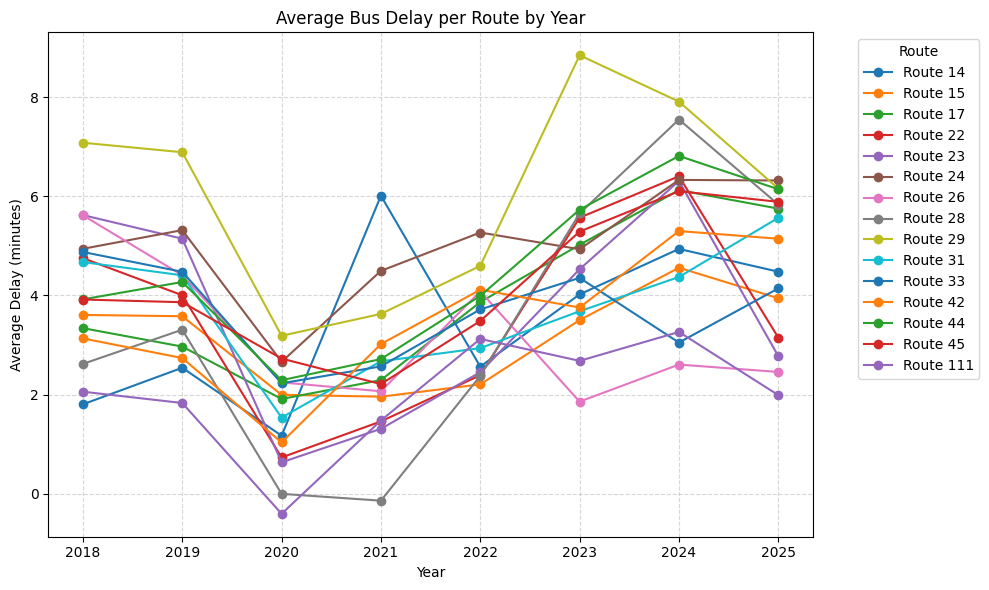

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

avg_delay_all = avg_delay_all.groupby(['year', 'route_id'], as_index=False)['delay_min'].mean()

plt.figure(figsize=(10, 6))

for route in avg_delay_all['route_id'].unique():
    route_data = avg_delay_all[avg_delay_all['route_id'] == route]
    plt.plot(route_data['year'], route_data['delay_min'], marker='o', label=f'Route {route}')

plt.title('Average Bus Delay per Route by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.legend(title='Route', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


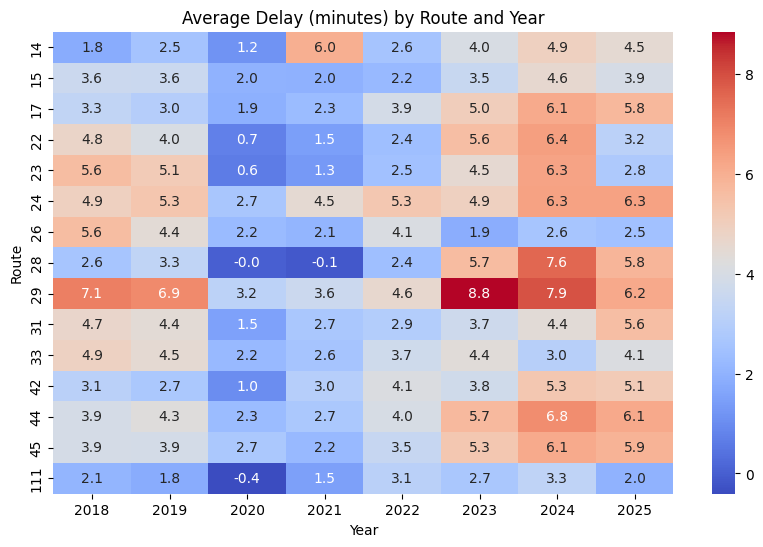

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure avg_delay_all is a pandas DataFrame
if not isinstance(avg_delay_all, pd.DataFrame):
    print("Error: avg_delay_all is not a pandas DataFrame.")
else:
    # Group by route_id and year and calculate the mean delay
    avg_delay_grouped = avg_delay_all.groupby(['route_id', 'year'])['delay_min'].mean().reset_index()

    # Create the pivot table
    pivot = avg_delay_grouped.pivot(index='route_id', columns='year', values='delay_min')

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt=".1f")
    plt.title('Average Delay (minutes) by Route and Year')
    plt.xlabel('Year')
    plt.ylabel('Route')
    plt.show()

In [17]:
per_file_year_status = []          # overall (all routes) by year & status
per_file_route_year_status = []    # by route, year & status

for f in files:
    try:
        # headway: prefer scheduled_headway, else fall back to headway
        hw_sched = pd.to_numeric(df.get('scheduled_headway'), errors='coerce')
        hw_alt   = pd.to_numeric(df.get('headway'),           errors='coerce')
        df['headway_min'] = hw_sched.fillna(hw_alt)

        # drop unusable rows / extreme outliers
        df = df.dropna(subset=['delay_min','headway_min'])
        df = df[(df['headway_min'] > 0) & (df['headway_min'] < 180)]
        df = df[df['delay_min'].between(-60, 180)]

        if df.empty:
            continue

        # classify status (treat "delayed" as late > 5 min; early arrivals count as on_time)
        df['status'] = np.where(df['delay_min'] > 5, 'delayed', 'on_time')

        # passenger wait estimate (vectorized, avoids .apply)
        # on_time: half the headway; delayed: half headway + delay
        df['wait_min'] = (df['headway_min'] / 2.0) + np.where(df['status'].eq('delayed'), df['delay_min'], 0.0)

        # aggregate: overall by year & status
        overall = df.groupby('status', as_index=False)['wait_min'].mean()
        overall['year'] = year
        per_file_year_status.append(overall)

        # aggregate: by route_id, year & status
        by_route = df.groupby(['route_id','status'], as_index=False)['wait_min'].mean()
        by_route['year'] = year
        per_file_route_year_status.append(by_route)

    except Exception as e:
        print(f"Error processing {f}: {e}")

# combine tiny summaries (RAM-safe)
avg_wait_year_status = pd.concat(per_file_year_status, ignore_index=True) if per_file_year_status else pd.DataFrame()
avg_wait_route_year_status = pd.concat(per_file_route_year_status, ignore_index=True) if per_file_route_year_status else pd.DataFrame()

# tidy & sort
if not avg_wait_year_status.empty:
    avg_wait_year_status = avg_wait_year_status.groupby(['year','status'], as_index=False)['wait_min'].mean().sort_values(['year','status'])
    avg_wait_year_status.to_csv("avg_wait_on_time_vs_delayed_by_year.csv", index=False)
    print("Overall avg wait (min) by year & status:")
    print(avg_wait_year_status.head(10))

if not avg_wait_route_year_status.empty:
    avg_wait_route_year_status = (avg_wait_route_year_status
                                  .groupby(['year','route_id','status'], as_index=False)['wait_min'].mean()
                                  .sort_values(['year','route_id','status']))
    avg_wait_route_year_status.to_csv("avg_wait_on_time_vs_delayed_by_route_year.csv", index=False)
    print("\nAvg wait (min) by route, year & status:")
    print(avg_wait_route_year_status.head(15))


Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2024-02.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2022-05.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2022-01.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2021-10.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2022-08.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2025-09.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2024-09.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA-Bus-Arrival-Departure-Times_2021-08.csv: name 'df' is not defined
Error processing MBTA_avg_delay_standardized/MBTA Bus Arrival Departure 